# 11-3 DBSCANを使って高密度の領域を特定する

### DBSCANとはデータの密度を利用してクラスタリングを行う方法
-  k-menas法のようにクラスタが球状であるという前提は設けない
-  カットオフ点を明示的に指定しなければならないデータセットの分割も行わない
-  密度の概念は，指定された半径ε以内に存在する点の個数

### DBSCANアルゴリズムでは，次の条件に基づいて，各データ点に特別なラベルを割り当てる

##### コア点: 半径ε以内に少なくともminpts個の隣接点を持つ点
##### ボーダー点:半径ε以内にminPts個ほどは隣接点がないが，半径ε以内にコア点を持つ点
##### minpts:コア点に必要な最小近傍点のこと

-  指定された半径ε以内に少なくとも指定された個数の隣接点があるような点は，コア点と見なされる．
-  半径ε以内の隣接点の個数が指定された個数に満たないものの，コア点の半径ε以内に設置するような点は，ボーダー点と見なされる．
-  コア点でもボーダー点でもないその他の点は全てノイズ点と見なされる．


### DBSCANアルゴリズムの大まかな手順
1. コア点ごとに，またはコア点の接続関係に基づいて，別々のクラスタを形成する．コア点同士が接続関係を持つのは，それらがεよりも離れていない時である．


2. 各ボーダー点を，それと対になっているコア点のクラスタに割り当てる






<img src="DBSCAN.png"  width=620>

### DBSCANの利点
-  k-means法のようにクラスタが球状であるという前提を設けない
-  点をそれぞれクラスタに割り当てる必要がない
-  ノイズ点を除去する能力有

### DBSCANの欠点
-  計算コストが高いためリアルタイム性が求められる場合には不向き
-  データが密集していると適切にεとminPtsを決めるのが困難
-  訓練データの数が固定の時，データセットの特徴量の数が増えるにつれて次元の呪いの影響が強まる．
-  (次元の呪いはユークリッド距離を指標として使っているときにも影響を受ける)

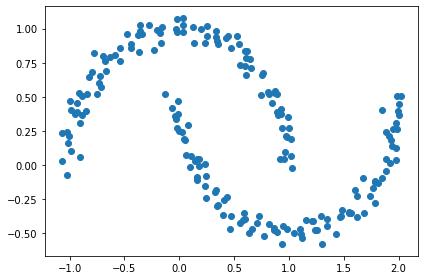

In [22]:
#半月状の構造を持つ新しいデータセットを作成
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
X,y=make_moons(n_samples=200,   #生成する点の総数
                           noise=0.05,   #データに追加するガウスノイズの標準偏差
                           random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

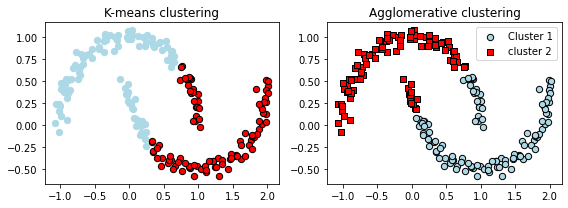

In [8]:
#k-means法と完全連結法のどちらかのクラスタアルゴリズムが，２つの半月状のデータセットを別々のクラスタとして識別できるのか確認する

f, (ax1, ax2)=plt.subplots(1,2,figsize=(8,3))
km=KMeans(n_clusters=2,random_state=0)
y_km=km.fit_predict(X)

ax1.scatter(X[y_km==0,0],
                  X[y_km==0,1],
                  c='lightblue',
                  marker='o',
                  s=40,
                  label='cluster 1')

ax1.scatter(X[y_km==1,0],
                  X[y_km==1,1],
                  c='red',
                  edgecolor='black',
                  marker='o',
                  s=40,
                  label='cluster 2')

ax1.set_title('K-means clustering')
ac=AgglomerativeClustering(n_clusters=2,
                                            affinity='euclidean',
                                            linkage='complete')

y_ac=ac.fit_predict(X)

ax2.scatter(X[y_ac==0,0],
                  X[y_ac==0,1],
                   c='lightblue',
                   edgecolor='black',
                   marker='o',
                   s=40,
                   label='Cluster 1')

ax2.scatter(X[y_ac==1,0],
                  X[y_ac==1,1],
                  c='red',
                  edgecolor='black',
                  marker='s',
                  s=40,
                  label='cluster 2')
"""
ax2.scatter(X[y_ac==2,0],
                  X[y_ac==2,1],
                  c='green',
                  edgecolor='black',
                  marker='s',
                  s=40,
                  label='cluster 3')
"""
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()



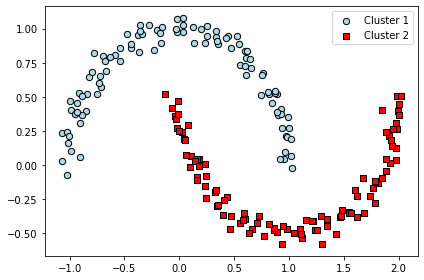

In [34]:
#DBSCANアルゴリズムを適用し，密度ベースの手法を用いて２つの半月状のクラスタを識別できるか確認
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.2,                         #隣接点とみなす2点間の最大距離
                     min_samples=5,  #ボーダー点の最小個数
                     metric='euclidean')  #距離の計算法

y_db=db.fit_predict(X)
plt.scatter(X[y_db==0,0],
                X[y_db==0,1],
                c='lightblue',
                edgecolor='black',
                marker='o',
                s=40,
                label='Cluster 1')
  
plt.scatter(X[y_db==1,0],
                X[y_db==1,1],
                c='red',
                edgecolor='black',
                marker='s',
                s=40,
                label='Cluster 2')


plt.legend()
plt.tight_layout()
plt.show()


# まとめ

-  11章では3種類のクラスタリングアルゴリズムを学んだ
-  k-means法
     -  データ点が球状にクラスタリングされる
     -  モデルの性能を評価するための正しいラベルが事前に分かっているという恵まれた状況はない
     -  エルボー法，シルエット分析で性能指標を調べた
     
     
   
   
   
-  擬集型階層的クラスタリング
    -  樹形図で表示される
    
    
    
    
   
-  DBSCAN
    -  局所的な密度に基づいて点をグループ化する
    -  外れ値を処理できる
    -  球状以外の形状を識別できる


 - 12章では教師あり学習の多層人工ニューラルネットワークを学ぶ